In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundary

ImportError: cannot import name 'DecisionBoundary' from 'sklearn.inspection' (/Users/aliqazi/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/__init__.py)

In [ ]:
prob2 = pd.read_csv('Assignment 4-blues_hand.csv')


In [ ]:
X = prob2.drop(['name','state'], axis =1)
X

In [240]:
X = prob2.values[:,2:7]
Y = prob2.values[:,4]

In [241]:
X


array([[1874, 0, 3, 1, 3],
       [1887, 0, 2, 1, 3],
       [1887, 0, 2, 1, 2],
       [1888, 0, 1, 2, 2],
       [1888, 0, 3, 2, 3],
       [1890, 0, 2, 1, 2],
       [1890, 0, 2, 1, 1],
       [1893, 0, 2, 1, 1],
       [1893, 0, 2, 2, 1],
       [1893, 0, 2, 2, 3],
       [1893, 0, 1, 1, 1],
       [1895, 0, 1, 1, 1],
       [1895, 0, 3, 3, 3],
       [1895, 0, 2, 1, 1],
       [1896, 0, 2, 1, 1],
       [1896, 0, 2, 1, 1],
       [1896, 0, 1, 1, 3],
       [1896, 0, 1, 1, 1],
       [1896, 0, 1, 1, 3],
       [1897, 0, 2, 1, 2],
       [1897, 0, 2, 2, 2],
       [1897, 0, 3, 1, 3],
       [1897, 0, 2, 2, 3],
       [1898, 0, 1, 2, 3],
       [1900, 0, 1, 1, 1],
       [1901, 0, 2, 3, 2],
       [1902, 0, 2, 1, 3],
       [1902, 0, 3, 2, 3],
       [1902, 0, 2, 3, 3],
       [1902, 0, 2, 1, 3],
       [1902, 0, 1, 1, 3],
       [1903, 0, 2, 2, 3],
       [1903, 0, 2, 2, 1],
       [1903, 0, 2, 1, 3],
       [1904, 0, 2, 1, 2],
       [1904, 0, 1, 2, 1],
       [1904, 0, 2, 2, 3],
 

In [242]:
Y=y
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [243]:
X_train, X_test, Y_train, Y_test = train_test_split(X, prob2['region'], random_state=0)

In [244]:
clf_entropy = DecisionTreeClassifier(criterion ="entropy", random_state = 100, max_depth= 10, min_samples_leaf=4)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       random_state=100)

In [245]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1,
       1, 2], dtype=int64)

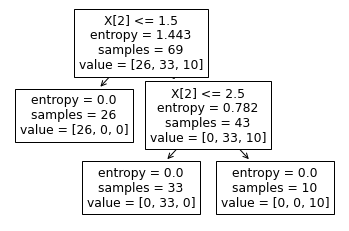

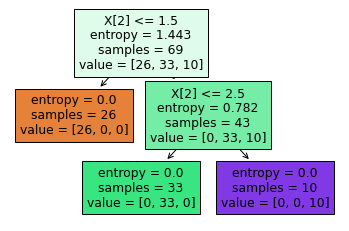

In [246]:
tree.plot_tree(clf_entropy)
plt.figure()
plot_tree(clf_entropy, filled=True)
plt.show()

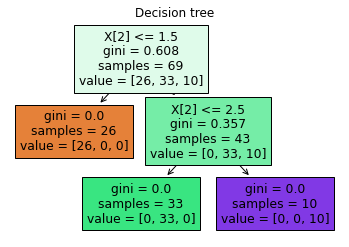

In [247]:
clf = DecisionTreeClassifier(criterion ="gini", random_state = 100, max_depth= 6, min_samples_leaf=4)
plt.figure()
clf = DecisionTreeClassifier().fit(X_train, Y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree")
plt.show()

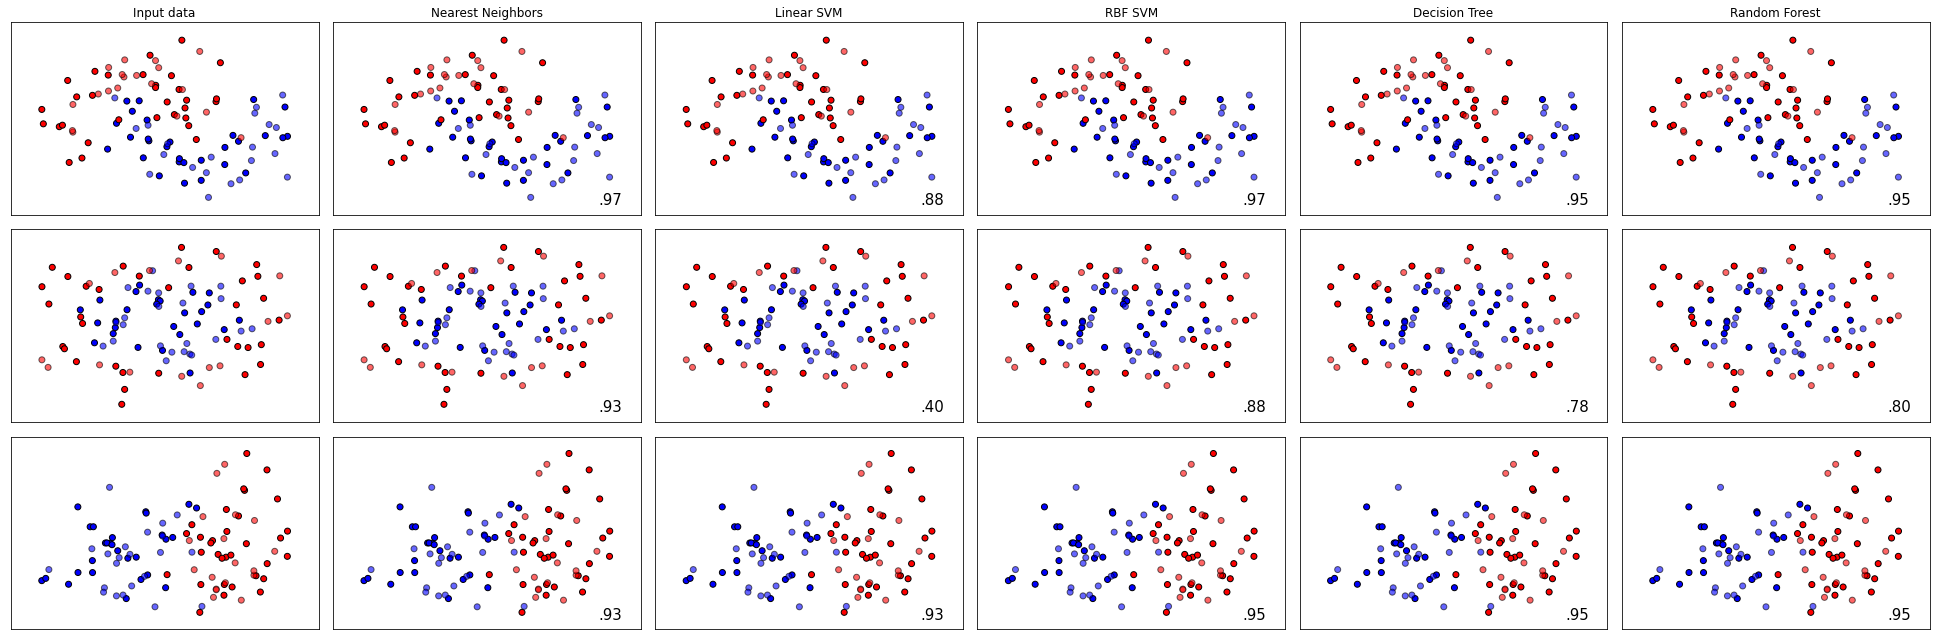

In [254]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
   # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
   # "Neural Net",
   # "AdaBoost",
   # "Naive Bayes",
   # "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
   # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
   # MLPClassifier(alpha=1, max_iter=1000),
   # AdaBoostClassifier(),
   # GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        #DecisionBoundaryDisplay.from_estimator(
         #   clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        #)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

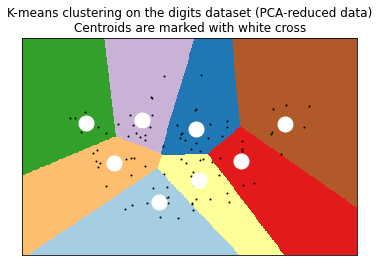

In [257]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    #marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()